# Main
## Part 1 - Face Detection
In this project, we aim to construct a face detection model. We used a method haar to extract features. After that, by applying extracted features to cascade method, we were able to dectect people's faces and also count the number of faces through pictures as well as webcam. Pre-trained cascade was used from OpenCV.

### Part 1.1 - Face Detection without Rotation on Image
We started off the project with face detection on an image.

In [33]:
# %load ../lib/count_face.py
def counting_face():
	import numpy as np
	import cv2
	from matplotlib import pyplot as plt

	# loading OpenCV cascade for haar method with frontal face
	face_cascade = cv2.CascadeClassifier('../lib/haarcascade_frontalface_default.xml')

	# loading test image
	img = cv2.imread('../data/test_image/104.jpg')
	gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	faces = face_cascade.detectMultiScale(gray, 1.2, 5)

	# implementing model
	for (x,y,w,h) in faces:
	    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),8)

	# showing image
	RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	plt.imshow(RGB_img)
	plt.show()

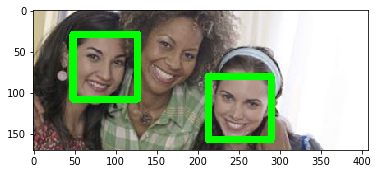

In [34]:
# implementing model
counting_face()

### Part 1.2 - Face Detection with Rotation
After implementation of Part 1, we realized the OpenCV front face cascade could not detect rotated face. Hence, we made some adjustments and declared additional functions to allow our model to analyze images from different rotation angle.

In [35]:
# %load ../lib/counting_faces_image.py
#!/usr/bin/env python3
"""
Created on Sat Apr 21 20:24:20 2018

@author: zailchen
"""

def face_dectect_image(directory = '../data/test_image/cascade/', scaleFactor = 1.3, minNeighbors = 5):

    import numpy as np
    import cv2
    import tensorflow
    import os
    from matplotlib import pyplot as plt
    
    
      # I followed Harrison Kingsley's work for this
      # Much of the source code is found https://pythonprogramming.net/haar-cascade-face-eye-detection-python-opencv-tutorial/
    
    def rotate_image(img, angle):
        if angle == 0: return img
        # print("checked for shape".format(image.shape))
        height, width = img.shape[:2]
        rot_mat = cv2.getRotationMatrix2D((width/2, height/2), angle, 0.9)
        result = cv2.warpAffine(img, rot_mat, (width, height), flags=cv2.INTER_LINEAR)
        return result
    
    def rotate_point(pos, img, angle):
        if angle == 0: return pos
        x = pos[:,0] - img.shape[1]*0.4
        y = pos[:,1] - img.shape[0]*0.4
        newx = x*cos(radians(angle)) + y*sin(radians(angle)) + img.shape[1]*0.4
        newy = -x*sin(radians(angle)) + y*cos(radians(angle)) + img.shape[0]*0.4
        return np.array((newx, newy, pos[:,2], pos[:,3]), int).T
    
    
    face_cascade = cv2.CascadeClassifier('../lib/haarcascade_frontalface_default.xml')
    
    
    PATH_TO_TEST_IMAGES_DIR = directory
    TEST_IMAGES_NAMES = os.listdir(directory)
    TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES_DIR, TEST_IMAGES_NAMES[i]) for i in range(1,len(TEST_IMAGES_NAMES))]
    n = len(TEST_IMAGE_PATHS)
    i = 0
    
    for image in TEST_IMAGE_PATHS: 
    
        img = cv2.imread(image)
        length = int(max(img.shape[0:2]))
        height = int(min(img.shape[0:2]))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        for angle in [0, -30, 30]:
            rimg = rotate_image(gray, angle)
            faces = face_cascade.detectMultiScale(rimg, scaleFactor, minNeighbors)
            
            if len(faces):
                    faces = rotate_point(faces, img, -angle)
                    break
        
        
        if len(faces) == 0:
            print("No faces found")
         
        else:         
            for (x,y,w,h) in faces:
                cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),10)
                
            cv2.rectangle(img, ((0,img.shape[0] - 50*int(height/1080))),(620 * int(length/1440), img.shape[0]), (255,255,255), -1)
            cv2.putText(img, "Number of faces detected: " + str(faces.shape[0]), (0,img.shape[0] -10), cv2.FONT_HERSHEY_TRIPLEX, 1 * (length*height)/(1536*2560)+0.2,  (0,0,0), 2)
        
        RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img)
        plt.show()
            
        cv2.imwrite('../output/processed_{}'.format(TEST_IMAGES_NAMES[i+1]),img)
        i +=1
        







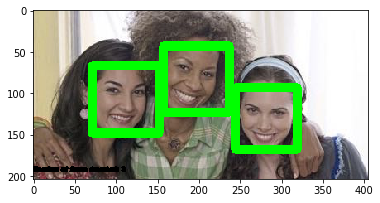

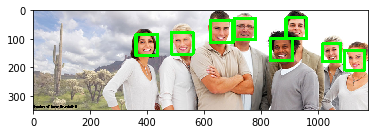

In [36]:
# implementing model
face_dectect_image()

### Part 1.3 - Real Time Face Detection with WebCam
After we improved our model, we wanted to further develop our model. Therefore, in this part, we implemented real time face detection using WebCam.

In [4]:
# loading function
%load ../lib/counting_faces_webcam

In [5]:
# Face Detection with Rotation using WebCam
face_dectect_webcam()

## Part 2 - Object Detection API using Tensorflow
After we constructed our model in Part 1, we realized there exist some limitations in cascade model. Cascade model tends to have lower accuracy in side faces or partially showed faces. Also, cascade cannot detect highly rotated faces. To overcome such limitations, a popular and powerful approach is the use of tensorflow. In this section, we implement object detection with a pretrained model, Tensorflow Object Detection API. This model requires intallation of tensorflow. Further instruction of the installation can be referred to https://github.com/tensorflow/models/tree/master/research/object_detection. This model can detect and categorize object, including person, bottle, cellphone, etc. However, cascada model would result better if only faces are showed on an image while this API model would result better if more parts of human body are showed.

### Part 2.1 - Object Detection API with Tensorflow on Image
Similar to Part 1.1, we started off with object detection using image.

In [46]:
%load ../doc/tensorflowFn.py

In [47]:
# Tensorflow Object Detection API using Tensorflow on Image
# this part requires installation of tensorflow and Tensorflow Object Detection API
# detail information can be referred to https://github.com/tensorflow/models/tree/master/research/object_detection
from PIL import Image
import numpy as np

directory = '../data/test_image/tensorflow/'
PATH_TO_TEST_IMAGES_DIR = directory
TEST_IMAGES_NAMES = os.listdir(directory)
TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES_DIR, TEST_IMAGES_NAMES[i]) for i in range(1,len(TEST_IMAGES_NAMES))]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

#
def load_image_into_numpy_array(image):
        (im_width, im_height) = image.size
        return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)
    
#

# implementing model
for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    image_np = load_image_into_numpy_array(image)
    # expand dimension
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # actual detection
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # visualization of detected image
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)

NameError: name 'run_inference_for_single_image' is not defined

### Part 2.2 - Real Time Object Detection API with Tensorflow using WebCam
Part 2.1 resulted in highly accurate result detecting most of the objects into their corresponding categories. We further improved the model by implementing the model using WebCam as an input. The result was again very accurate.

In [ ]:
%load ../doc/tensorflowFnVideo.py


In [ ]:
# ## tensorflow webcam object detection
# this part requires installation of tensorflow and Tensorflow Object Detection API
# detail information can be referred to https://github.com/tensorflow/models/tree/master/research/object_detection


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')    
    
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

    
cap = cv2.VideoCapture(0)
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
    ret = True
    while (ret):
        ret,image_np = cap.read()
        image_np_expanded = np.expand_dims(image_np, axis=0)
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        scores = detection_graph.get_tensor_by_name('detection_scores:0')
        classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
        vis_util.visualize_boxes_and_labels_on_image_array(
            image_np,
            np.squeeze(boxes),
            np.squeeze(classes).astype(np.int32),
            np.squeeze(scores),
            category_index,
            use_normalized_coordinates=True,
            line_thickness=8)
        cv2.imshow('image', cv2.resize(image_np,(1280,800)))
        if cv2.waitKey(25) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            cap.release()
            break